In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# code for creating groued bar chat for displaying different feature set perfornace contrasted with top smart 2 agent

df_v1 = pd.read_csv("simulation_data/q_learn_approx_attempt_raise/qapprox_game_outcomes_v1.csv")
df_v1 = df_v1.groupby('player')[['player_type']].value_counts().reset_index(name='count')
df_v1["features"] = "Version 1"
df_v2 = pd.read_csv("simulation_data/q_learn_approx_attempt_raise/qapprox_game_outcomes_v2.csv")
df_v2 = df_v2.groupby('player')[['player_type']].value_counts().reset_index(name='count')
df_v2["features"] = "Version 2"
df_v3 = pd.read_csv("simulation_data/q_learn_approx_attempt_raise/qapprox_game_outcomes_v3.csv")
df_v3 = df_v3.groupby('player')[['player_type']].value_counts().reset_index(name='count')
df_v3["features"] = "Version 3"

df_all_v = pd.concat([df_v1, df_v2], axis=0)
df_all_v = pd.concat([df_all_v, df_v3], axis=0)

df_all_v["player_type"] = df_all_v["player_type"].str.title()

df_all_v = df_all_v[df_all_v["player_type"].isin(['Approx Q Learning', 'Smart 2: 2, 0.6'])]

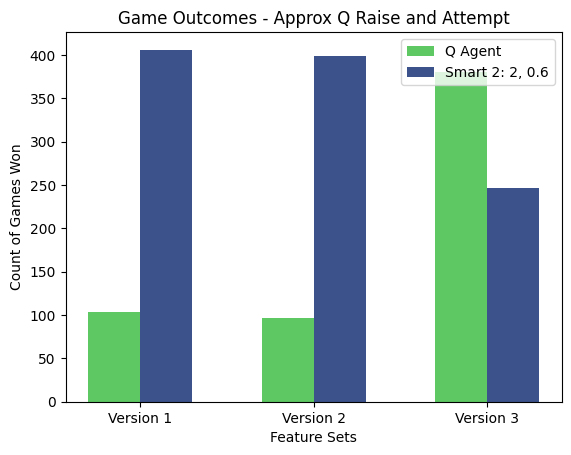

In [3]:
features_version = df_all_v["features"].unique()
bars = np.arange(3)

q_count = df_all_v[df_all_v["player_type"] == "Approx Q Learning"]["count"]
s_count = df_all_v[df_all_v["player_type"] == "Smart 2: 2, 0.6"]["count"]

bars_width = 0.3

plt.bar(bars-(bars_width/2), q_count, bars_width, color="#5ec962")
plt.bar(bars+(bars_width/2), s_count, bars_width, color="#3b528b")

plt.xticks(bars, features_version)



plt.xlabel("Feature Sets")
plt.ylabel("Count of Games Won")
plt.legend(["Q Agent", "Smart 2: 2, 0.6"])

plt.title("Game Outcomes - Approx Q Raise and Attempt")

plt.show()